<a href="https://colab.research.google.com/github/Shikha812/portfolio/blob/main/Diabetes_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Diabetes Prediction Project
This project predicts whether a person has diabetes using health indicators.  
Dataset: Pima Indians Diabetes Dataset (public dataset).  

### Steps:
1. Import libraries  
2. Load and explore the dataset  
3. Clean the data (replace invalid values)  
4. Perform Exploratory Data Analysis (EDA)  
5. Preprocess data for machine learning  
6. Train multiple ML models  
7. Evaluate their performance  
8. Show feature importance and insights


In [1]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report, roc_auc_score)

import joblib

sns.set(style="whitegrid")


In [2]:

# Step 2: Load dataset
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

# Step 3: Explore dataset
df.info()
print("\nMissing values in each column:")
print(df.isnull().sum())
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:

# Step 4: Handle invalid values
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df_clean = df.copy()

for col in cols_with_zeros:
    median_value = df_clean.loc[df_clean[col] != 0, col].median()
    df_clean[col] = df_clean[col].replace(0, median_value)

df_clean[cols_with_zeros].describe().T


,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.656250,30.438286,44.0,99.75,117.0,140.25,199.0
BloodPressure,768.0,72.386719,12.096642,24.0,64.00,72.0,80.00,122.0
SkinThickness,768.0,29.108073,8.791221,7.0,25.00,29.0,32.00,99.0
Insulin,768.0,140.671875,86.383060,14.0,121.50,125.0,127.25,846.0
BMI,768.0,32.455208,6.875177,18.2,27.50,32.3,36.60,67.1


/tmp/ipython-input-2671218933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df_clean, palette="Set2")


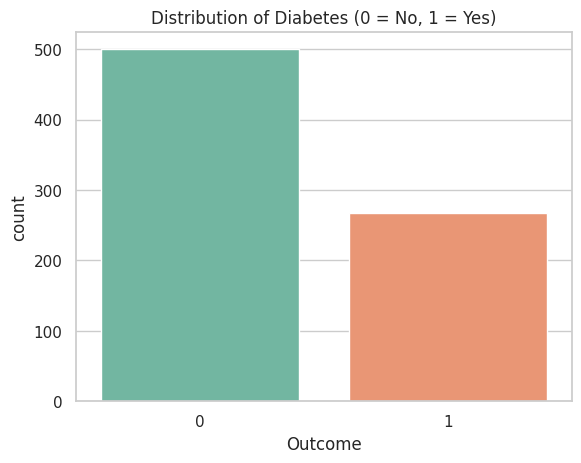

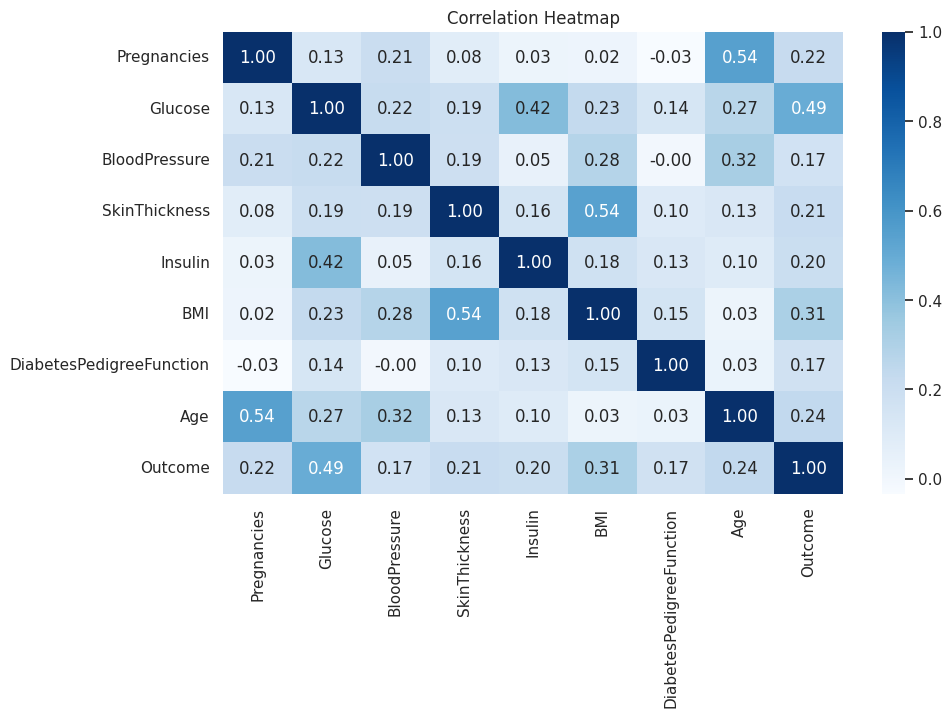

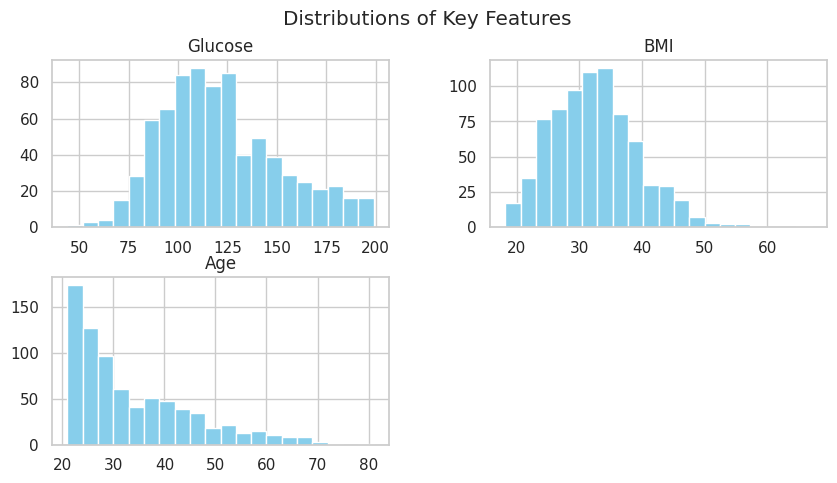

In [5]:

# Step 5: Exploratory Data Analysis (EDA)
sns.countplot(x="Outcome", data=df_clean, palette="Set2")
plt.title("Distribution of Diabetes (0 = No, 1 = Yes)")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

features = ["Glucose", "BMI", "Age"]
df_clean[features].hist(figsize=(10,5), bins=20, color="skyblue")
plt.suptitle("Distributions of Key Features")
plt.show()


In [6]:

# Step 6: Prepare data for ML
X = df_clean.drop("Outcome", axis=1)
y = df_clean["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 614
Test size: 154



## 🤖 Why these models?

In this project, I am comparing **three machine learning models**:

1. **Logistic Regression** – simple, interpretable baseline  
2. **Random Forest** – strong ensemble method, handles complexity, gives feature importance  
3. **SVM** – robust classifier, works well with standardized features  

👉 These represent **linear, ensemble, and kernel-based** approaches.



=== Logistic Regression ===
Accuracy: 69.48 %
Precision: 0.57
Recall: 0.5
F1-score: 0.53
ROC AUC: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



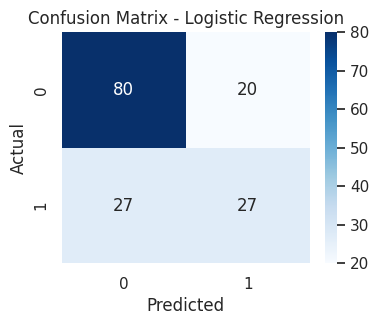


=== Random Forest ===
Accuracy: 77.92 %
Precision: 0.72
Recall: 0.61
F1-score: 0.66
ROC AUC: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



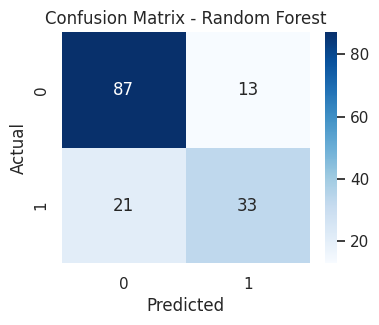


=== SVM ===
Accuracy: 74.03 %
Precision: 0.65
Recall: 0.56
F1-score: 0.6
ROC AUC: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



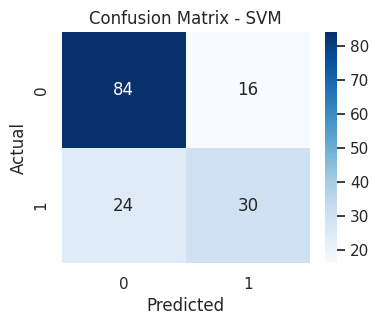

In [7]:

# Step 7: Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(solver="liblinear", max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    try:
        y_proba = model.predict_proba(X_test_scaled)[:,1]
        auc = roc_auc_score(y_test, y_proba)
    except:
        auc = None

    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc*100, 2), "%")
    print("Precision:", round(prec, 2))
    print("Recall:", round(rec, 2))
    print("F1-score:", round(f1, 2))
    if auc:
        print("ROC AUC:", round(auc, 2))

    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "AUC": auc
    })



## 📊 How to decide the best model?

We compare using:
- Accuracy – overall correctness  
- Precision – correctness of positive predictions  
- Recall – ability to catch positive cases (important in healthcare!)  
- F1-score – balance of precision and recall  
- ROC AUC – separation of classes  

👉 In healthcare, **Recall is most important** because missing a patient with diabetes is riskier than a false alarm.


In [8]:

# Step 8: Compare models
results_df = pd.DataFrame(results).set_index("Model")
results_df


,Accuracy,Precision,Recall,F1,AUC
Model,,,,,
Logistic Regression,0.694805,0.574468,0.500000,0.534653,0.812778
Random Forest,0.779221,0.717391,0.611111,0.660000,0.817870
SVM,0.740260,0.652174,0.555556,0.600000,0.796389


Top features:
 Glucose                     0.274086
BMI                         0.161903
DiabetesPedigreeFunction    0.125020
Age                         0.112985
Insulin                     0.091224
dtype: float64


/tmp/ipython-input-3690385770.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette="viridis")


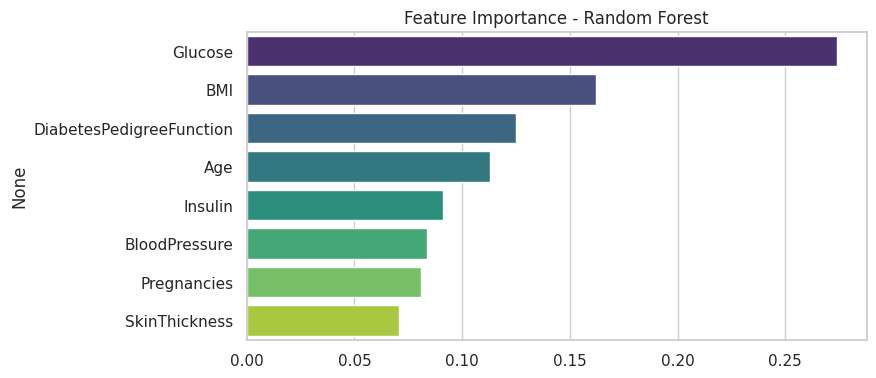

In [9]:

# Step 9: Feature importance (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top features:\n", importance.head())

plt.figure(figsize=(8,4))
sns.barplot(x=importance.values, y=importance.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()



## 🏆 Which model is best?

- Logistic Regression → simple and interpretable, but lower performance  
- Random Forest → best balance of accuracy and recall, plus feature importance  
- SVM → good, but slightly behind Random Forest  

👉 **Final Choice: Random Forest**  
- High accuracy and recall  
- Clear feature importance (Glucose, BMI, Age are top predictors)  
- Matches medical understanding of diabetes risk factors


In [10]:

# Step 10: Final Insights
print("----- Project Insights -----")
print("1. Glucose, BMI, and Age are the strongest predictors of diabetes.")
print("2. Random Forest was the best model for this dataset.")
print("3. Logistic Regression is interpretable but less accurate.")
print("4. Recall is very important in healthcare to avoid missing positive cases.")
print("5. Predictive models like this can help in early detection of diabetes.")


----- Project Insights -----
1. Glucose, BMI, and Age are the strongest predictors of diabetes.
2. Random Forest was the best model for this dataset.
3. Logistic Regression is interpretable but less accurate.
4. Recall is very important in healthcare to avoid missing positive cases.
5. Predictive models like this can help in early detection of diabetes.



## 🔑 Project Insights

1. **Glucose, BMI, and Age** are the strongest predictors  
2. **Random Forest** gave the best performance overall  
3. **Recall is critical in healthcare** (better to flag a non-diabetic than miss a diabetic)  
4. Predictive analytics can support **early diagnosis** and healthcare decision-making
